In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [6]:
#part 1
#Estimate the intercept coefficient (α) and slope coefficient (β) for each of the ten industry portfolio
#
#parameters setting
filename_industry = "Exam_Industries.xlsx"
filename_market = "Exam_Market.xlsx"
r_f = 0

#industry = pd.read_csv(filename_industry, index_col=0)
industry = pd.read_excel(filename_industry, index_col=0)
industry_cols = industry.columns
#market = pd.read_csv(filename_market, index_col=0)
market = pd.read_excel(filename_market, index_col=0)
market_col = market.columns[0]


#combine two df together
df = pd.merge(market, industry, left_index=True, right_index=True)
results = pd.DataFrame(columns=['Industry', 'Alpha', 'Beta'])


for industry in industry_cols:
    #x
    excess_returns_market = df[market_col] - r_f
    #y
    excess_returns_industry = df[industry] - r_f
    #regress
    #[(Ri-Rf) = alpha + beta*(Rm-Rf)]
    cofficients = np.polyfit(excess_returns_market,excess_returns_industry,deg=1)
    beta = cofficients[0] #slope
    alpha = cofficients[1] #intercept
    
    new_row = pd.DataFrame({'Industry': [industry], 'Alpha': [alpha], 'Beta': [beta]})
    results = pd.concat([results, new_row], ignore_index = True, axis = 0)
results

,Industry,Alpha,Beta
0,Cnsmr,0.016203,0.951955
1,Manuf,-0.174353,0.958456
2,HiTec,0.180885,1.040024
3,Hlth,0.316399,0.782450
4,Other,-0.037570,1.075347


The intercept(0.9410271599518645) and slope coefficients(0.0883235436141288) for the SML


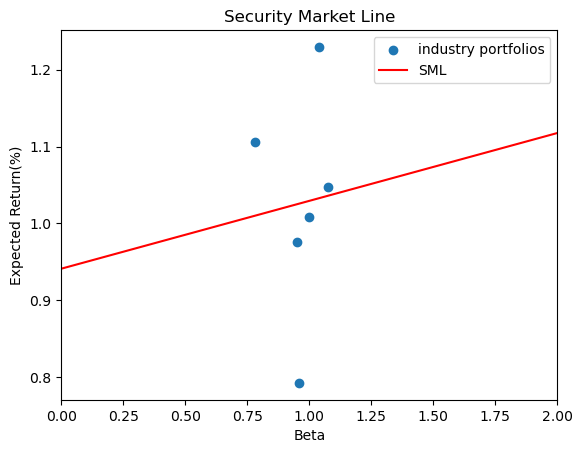

In [7]:
#part 2.1
#estimated intercept and slope coefficients for the SML
#
mean = pd.DataFrame({"mean":df.mean()})

betas = results.copy()
betas.set_index("Industry", inplace = True)
betas = betas[["Beta"]]

regress = pd.merge(mean, betas, left_index=True, right_index = True, how = "outer")
regress["Beta"][market_col] = 1

#regress returns and beta
#R_p = R_f + (R_m - R_f)*beta_p
#regress
cofficients = np.polyfit(regress["Beta"], regress["mean"],deg=1)
R_f = cofficients[1]#intercept 
risk_premium = cofficients[0]#slope 
print(f"The intercept({R_f}) and slope coefficients({risk_premium}) for the SML")


#part 2.2 plotting
#
#
#parameters setting
x_start = 0
x_end = 2

xlim_start = 0
xlim_end = 2

label1 = "industry portfolios"
label2 = 'SML'

xlabel = "Beta"
ylabel = 'Expected Return(%)'
title = "Security Market Line"

# intercept and slope
#R_p = R_f + (R_m - R_f)*beta_p
intercept = R_f
slope = risk_premium

# create data points
x = np.linspace(x_start, x_end, 1000)
plt.xlim(xlim_start,xlim_end)
y = intercept + slope * x  

plt.scatter(regress["Beta"], regress["mean"], label=label1)
plt.plot(x, y, color='red', label=label2)  

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)

plt.legend()

plt.show()

# Briefly explain (in words) the economic interpretation for the intercept and slope coefficients of the SML.

**Intercept coefficient from market model regression shows pricing error relative to CAPM.**
>If the intercept coefficient is positive, it suggests that the asset has been earning higher returns than what would be predicted by the CAPM, indicating that the asset might be undervalued. Conversely, a negative intercept implies the asset has been underperforming relative to CAPM expectations, potentially indicating overvaluation.

**Slope coefficient from market model regression shows degree of exposure to market risk.**
>If the slope coefficient (beta) is greater than 1, it signifies that the asset is more volatile than the overall market. A beta less than 1 suggests that the asset is less volatile than the market. Beta provides valuable information to investors about an asset's sensitivity to market movements, helping them assess and manage risk in their portfolios.
